In [1]:
import sys
sys.path.append("../repos/erlking/erlking/")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.forest import _generate_sample_indices
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn.cross_validation as xval
from erlking import random_forest_error, calc_inbag
sns.set()
%matplotlib inline

In [3]:
mpg_names = ["mpg","cyl","disp","hp","weight","accel","year","origin","name"]
mpg_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                     names=mpg_names, sep="\s+")
mpg_df["hp"] = pd.to_numeric(mpg_df["hp"], errors="coerce")
mpg_df = mpg_df.dropna()

In [5]:
mpg_y = mpg_df["mpg"].as_matrix()
mpg_X = mpg_df.drop(["mpg", "name"], axis=1).as_matrix()

In [4]:
print mpg_df.shape
print mpg_X.shape

(392, 9)

In [7]:
mpg_X

array([[   8. ,  307. ,  130. , ...,   12. ,   70. ,    1. ],
       [   8. ,  350. ,  165. , ...,   11.5,   70. ,    1. ],
       [   8. ,  318. ,  150. , ...,   11. ,   70. ,    1. ],
       ..., 
       [   4. ,  135. ,   84. , ...,   11.6,   82. ,    1. ],
       [   4. ,  120. ,   79. , ...,   18.6,   82. ,    1. ],
       [   4. ,  119. ,   82. , ...,   19.4,   82. ,    1. ]])

(array([  27.,   95.,  120.,   44.,   19.,   47.,   13.,   14.,    5.,    8.]),
 array([  46. ,   64.4,   82.8,  101.2,  119.6,  138. ,  156.4,  174.8,
         193.2,  211.6,  230. ]),
 <a list of 10 Patch objects>)

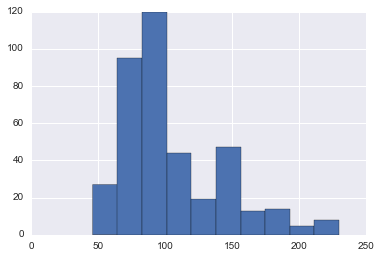

In [8]:
plt.hist(mpg_X[:, 2])

In [9]:
mpg_X_train, mpg_X_test, mpg_y_train, mpg_y_test = xval.train_test_split(mpg_X, mpg_y,
                                                                         test_size=0.25, random_state=42)

In [10]:
n_trees = 2000
mpg_forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
mpg_forest.fit(mpg_X_train, mpg_y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [11]:
mpg_inbag = calc_inbag(mpg_X_train.shape[0], mpg_forest)

In [12]:
mpg_inbag

array([[ 4.,  1.,  1., ...,  2.,  1.,  0.],
       [ 5.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  2.,  2.,  0.],
       ..., 
       [ 1.,  0.,  1., ...,  1.,  0.,  2.],
       [ 4.,  1.,  0., ...,  3.,  0.,  2.],
       [ 1.,  0.,  0., ...,  1.,  1.,  1.]])

In [13]:
mpg_V_IJ_unbiased = random_forest_error(mpg_forest, mpg_inbag, mpg_X_train, mpg_X_test)
mpg_y_hat = mpg_forest.predict(mpg_X_test)

In [14]:
print mpg_X_test.shape
print mpg_X_train.shape

(98, 7)

In [16]:
mpg_V_IJ_unbiased[0:10]

array([ 1.40967883,  1.8338694 ,  2.38421518,  2.01368312,  0.41033534,
        0.97426005,  3.19402027,  2.64107946,  0.86193276,  4.04181957])

(array([ 63.,  26.,   7.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  0.25747743,   2.37626436,   4.49505129,   6.61383822,
          8.73262515,  10.85141208,  12.97019901,  15.08898594,
         17.20777287,  19.3265598 ,  21.44534673]),
 <a list of 10 Patch objects>)

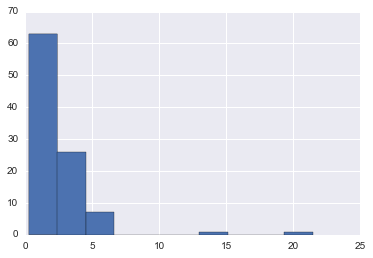

In [17]:
plt.hist(mpg_V_IJ_unbiased)

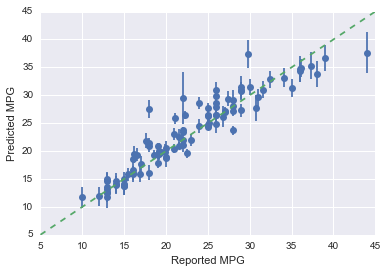

In [18]:
plt.errorbar(mpg_y_test, mpg_y_hat, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([5, 45], [5, 45], '--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')

In [19]:
spam_names = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names',
                         skiprows=30)
spam_names = spam_names['1']
spam_names =  [n.split(':')[0] for n in spam_names] + ['spam']
spam_df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data",
                      names=spam_names)

In [20]:
spam_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [21]:
spam_y = spam_df["spam"].as_matrix()
spam_df["spam"].as_matrix()
spam_X = spam_df.drop(["spam"], axis=1).as_matrix()

(4601, 57)

In [22]:
spam_X_train, spam_X_test, spam_y_train, spam_y_test = xval.train_test_split(spam_X, spam_y,
                                                                             test_size=0.2, random_state=42)

In [23]:
spam_RFC = RandomForestClassifier(max_features=5, n_estimators=n_trees, random_state=42)
spam_RFC.fit(spam_X_train, spam_y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
print spam_X.shape
print spam_y_train.shape

(3680,)

In [25]:
spam_inbag = calc_inbag(spam_X_train.shape[0], spam_RFC)

In [26]:
spam_inbag

array([[ 2.,  0.,  3., ...,  2.,  1.,  0.],
       [ 1.,  2.,  1., ...,  1.,  0.,  0.],
       [ 0.,  1.,  2., ...,  0.,  0.,  1.],
       ..., 
       [ 1.,  2.,  0., ...,  2.,  0.,  2.],
       [ 2.,  0.,  0., ...,  1.,  0.,  2.],
       [ 4.,  2.,  1., ...,  3.,  1.,  3.]])

In [27]:
spam_V_IJ_unbiased = random_forest_error(spam_RFC, spam_inbag, spam_X_train, spam_X_test)
spam_y_hat = spam_RFC.predict_proba(spam_X_test)

In [28]:
spam_y_hat.shape

(921, 2)

In [29]:
spam_V_IJ_unbiased.min()

-0.017130736532487645

In [31]:
spam_y_hat[0:10]

array([[ 1.      ,  0.      ],
       [ 0.7305  ,  0.2695  ],
       [ 0.9435  ,  0.0565  ],
       [ 0.4415  ,  0.5585  ],
       [ 0.9885  ,  0.0115  ],
       [ 0.81    ,  0.19    ],
       [ 0.9605  ,  0.0395  ],
       [ 0.929375,  0.070625],
       [ 0.937   ,  0.063   ],
       [ 0.846   ,  0.154   ]])

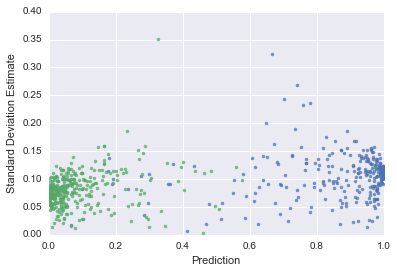

In [30]:
idx = np.where(spam_y_test==1)[0]
plt.errorbar(spam_y_hat[idx, 1], np.sqrt(spam_V_IJ_unbiased[idx]), fmt='.', alpha=0.75)

idx = np.where(spam_y_test==0)[0]
plt.errorbar(spam_y_hat[idx, 1], np.sqrt(spam_V_IJ_unbiased[idx]), fmt='.', alpha=0.75)
plt.xlabel('Prediction')
plt.ylabel('Standard Deviation Estimate')